In [1]:
# This Line of Code is used to connect our google colab to our google drive where we must place our dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This line is used to unzip the dataset
!unzip "drive/MyDrive/Traffic signs/archive (12).zip" -d "drive/MyDrive/Traffic signs"

Archive:  drive/MyDrive/Traffic signs/archive (12).zip
replace drive/MyDrive/Traffic signs/signname.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: drive/MyDrive/Traffic signs/signname.csv  
  inflating: drive/MyDrive/Traffic signs/test.p  
  inflating: drive/MyDrive/Traffic signs/train.p  
  inflating: drive/MyDrive/Traffic signs/valid.p  


In [3]:
# Importing the necessary Libraries
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings
warnings.filterwarnings("ignore")

#PHASE 1 Data Loading and Preprocessing


In [4]:
#PHASE 1 Data Loading and Preprocessing
# The image was saved as a pickle file and as a result we will be using the pickle library to load out this data
# The dataset is divided into three categories the train.p, the valid.p and the test.p for training, validation and testing respectively
# Below we define the file paths (make sure your notebook is in the same folder or update paths)
training_file = 'drive/MyDrive/Traffic signs/train.p'
validation_file = 'drive/MyDrive/Traffic signs/valid.p'
testing_file = 'drive/MyDrive/Traffic signs/test.p'

# Load the training data
with open(training_file, mode='rb') as f:
    train = pickle.load(f)

# Load validation and testing data
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Usually, these pickle files are dictionaries.
# Let's extract the features (X) and labels (y).
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Check the shapes to confirm
print("X_train shape:", X_train.shape) # Should be (num_samples, height, width, channels) like (n_samples, 32, 32, 3) usually
print("y_train shape:", y_train.shape) # Should be (n_samples,)

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)


In [5]:
# Normalize the training, validation, and testing sets
X_train = X_train.astype('float32') / 255.0
X_valid = X_valid.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
# Load the csv file containing the traffic signs and their IDs
sign_names = pd.read_csv('drive/MyDrive/Traffic signs/signname.csv')
print(sign_names.head())

   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)


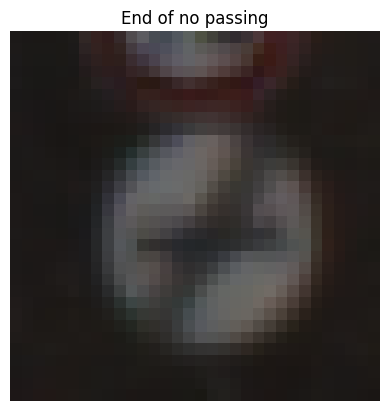

In [7]:
# Create a dictionary for label to sign name so that each sign has it own label and so it will be easier for us when we want to visualize the images
# label_map is the name of our dictionary, dict is the keyword we use when creating a dictionary, zip is used to pair the first item, ClassId, with its corresponding second item,SignName

label_map = dict(zip(sign_names['ClassId'], sign_names['SignName']))

# Pick one image
image = X_train[0]
label = y_train[0]

# imshow is a module from matplotlib used to show images.
# plt.axis('off') → hides the x/y axes so the image looks cleaner.
plt.imshow(image)
plt.title(label_map[label])
plt.axis('off')
plt.show()

# PHASE 2 Model Building

In [8]:
# PHASE 2 Model Building
number_of_classes = len(sign_names)

model = keras.Sequential([
    # First Convolutional Block
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    # Second Convolutional Block
    layers.Conv2D(64,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    #Third Convolutional Block
    layers.Conv2D(128,(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    # Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(number_of_classes, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("Model defined and compiled successfully.")

Model defined and compiled successfully.


# PHASE 3 Model Training

In [9]:
# PHASE 3 Model Training
# Define training hyperparameters which are the epochs and the batch_size
# epochs are the number of times the entire training dataset is passed through the model during training.
# batch_size controls the number of images the model sees at a time before updating it's weight
epochs = 20
batch_size = 32

In [10]:
# Train the model using training data and validate using validation data
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

Epoch 1/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 34s 30ms/step - accuracy: 0.2481 - loss: 2.7438 - val_accuracy: 0.7977 - val_loss: 0.7662
Epoch 2/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 31s 28ms/step - accuracy: 0.7457 - loss: 0.7839 - val_accuracy: 0.9009 - val_loss: 0.3986
Epoch 3/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.8605 - loss: 0.4192 - val_accuracy: 0.9288 - val_loss: 0.2873
Epoch 4/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.8986 - loss: 0.3023 - val_accuracy: 0.9340 - val_loss: 0.2556
Epoch 5/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 42s 29ms/step - accuracy: 0.9206 - loss: 0.2323 - val_accuracy: 0.9503 - val_loss: 0.2559
Epoch 6/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 28ms/step - accuracy: 0.9334 - loss: 0.1915 - val_accuracy: 0.9596 - val_loss: 0.1571
Epoch 7/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step - accuracy: 0.9452 - loss: 0.1601 - val_accuracy: 0.9499 - val_loss: 0.2015
Epoch 8/20
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 40s 29ms/step - accuracy: 0.9589 -

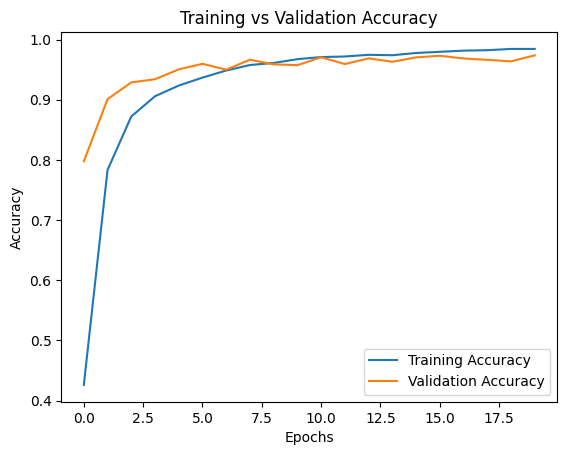

In [11]:
# Training visualization
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()